# Analyse der Perfomance von Studenten und Vorhersage der erreichten Punkte
In diesem Projekt beschäftige ich mich mit dem Datanset "Students Performance in Exams" von Kaggle https://www.kaggle.com/spscientist/students-performance-in-exams
Dataset stammt von : http://roycekimmons.com/tools/generated_data/exams
Umfasste Spalten:
 - gender
 - race/ethnicity
 - parental level of education
 - lunch
 - test preparation course
 - math score
 - reading score
 - writing score

In [2]:
#importiere die üblichen Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Lese die Daten ein
data = pd.read_csv('StudentsPerformance.csv')

In [4]:
#Kurzes Kennenlernen mit Dataset
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#Welche Typen von Lunch gibt es? Nur 2: Standard und free/reduced
data.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [8]:
#Benenne die Spalten um für die leichtere Bedienung
data.columns = ['Gender', 'Ethnicity', 'ParentEdu', 'Lunch', 'PrepCourse', 'MathScore', 'ReadingScore', 'WritingScore']

In [10]:
#Fehlen uns irgendwelche Werte?
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum()*100)/(df.isnull().count())
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(output)
    else:
        return(False)

In [12]:
#Keine fehlende Werte
check_missing_data(data)

False

In [13]:
#Füge eine Spalte MiddleScore ein. Diese enthält den Mittelwert der 3 Scores. Diesen Wert werde ich später versuchen vorherzusagen.
data['MiddleScore'] = (data.MathScore + data.ReadingScore + data.WritingScore)/3

In [16]:
data.head()

,Gender,Ethnicity,ParentEdu,Lunch,PrepCourse,MathScore,ReadingScore,WritingScore,MiddleScore
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Die Spalte Ethnicity ist nicht klar. Diese wird in Gruppen A-E unterteilt. Mal sehen, ob diese Aufteilung einen Einfluss auf Score hat.

In [18]:
data.groupby('Ethnicity').mean()

,MathScore,ReadingScore,WritingScore,MiddleScore
Ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


Klare Unterschiede erkennbar.(s. MiddleScore)

In [23]:
#Wie Beeinflusst die Ausbildung der Eltern die Punktzahl?
data.groupby('ParentEdu').mean()

,MathScore,ReadingScore,WritingScore,MiddleScore
ParentEdu,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


In [37]:
#Und Geschlecht?


In [26]:
mean_gender = data.groupby('Gender').mean()

<Figure size 1008x432 with 0 Axes>

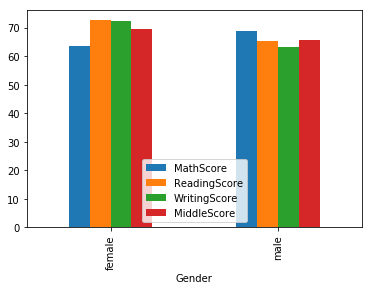

In [36]:
#Weibliche Teilnehmer haben bessere Resultate im Mittel. Männliche Teilnehmer erzielen jedoch bessere Resultate bei Mathe.
plt.figure(figsize=(14,6))
mean_gender.plot(kind = 'bar')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


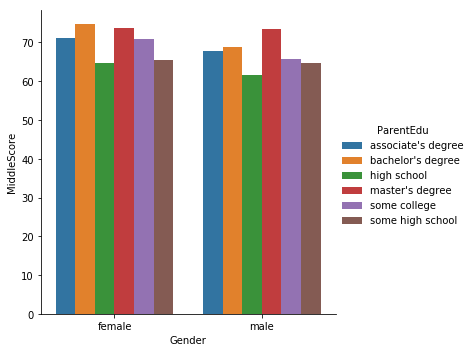

In [43]:
#Schauen wir uns die Abhängigkeit vom Bildungsgrad der Eltern
parent_gender = data.groupby(['Gender','ParentEdu']).mean().reset_index()
sns.factorplot(x='Gender', y='MiddleScore', hue='ParentEdu', data=parent_gender, kind='bar')

 Wir sehen klar, dass im Falle, wenn Eltern ein Degree haben, die Studenten bessere Resultate erzielen. Eventuell macht es Sinn die Aufteilung in verschiedene Degrees zu vereinfachen: entweder hat man ein Degree oder nicht. 

In [45]:
data['Has_Degree'] = data.ParentEdu.apply(lambda x: 'no' if x in ['high school', 'some high school'] else 'yes')

In [48]:
data.sample(5)

,Gender,Ethnicity,ParentEdu,Lunch,PrepCourse,MathScore,ReadingScore,WritingScore,MiddleScore,Has_Degree
621,male,group B,bachelor's degree,free/reduced,none,62,63,56,60.333333,yes
552,female,group B,associate's degree,standard,none,40,48,50,46.000000,yes
675,female,group B,some college,standard,completed,50,64,66,60.000000,yes
519,female,group B,high school,free/reduced,completed,67,78,79,74.666667,no
840,female,group D,high school,free/reduced,none,39,52,46,45.666667,no


In [55]:
#Wie beeinflusst Lunch die Punktzahl?
data.groupby('Lunch').mean()

,MathScore,ReadingScore,WritingScore,MiddleScore
Lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


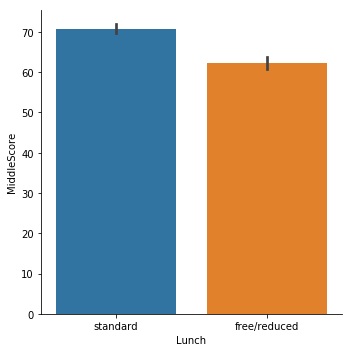

In [58]:
sns.factorplot(x = 'Lunch', y = 'MiddleScore', data = data, kind = 'bar')

Tatsächlich sehen wir, dass Lunch auch einen Einfluss auf die Punktzahl hat. 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


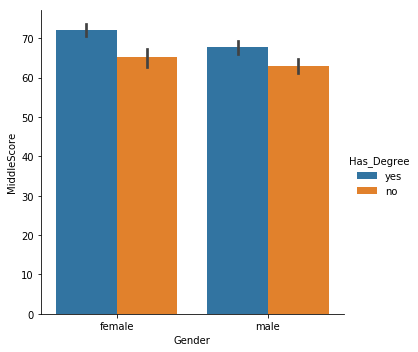

In [60]:
sns.factorplot(x ='Gender', y='MiddleScore', hue = 'Has_Degree', data = data, kind = 'bar')

Klare Unterschiede zu erkennen!

In [64]:
#nun räumen wir ein wenig auf und bereiten die Daten für das prediction Modell vor
dataset = data.groupby(['Gender', 'Has_Degree', 'PrepCourse', 'Lunch', 'Ethnicity']).mean().reset_index()
sortdata = dataset.sort_values(by = 'MiddleScore', ascending = False)
sortdata.drop(columns = ['MathScore', 'ReadingScore', 'WritingScore'], inplace = True)

In [76]:
sortdata.head(20)

,Gender,Has_Degree,PrepCourse,Lunch,Ethnicity,MiddleScore
28,female,yes,completed,standard,group E,84.023810
5,female,no,completed,standard,group A,82.666667
66,male,yes,completed,standard,group C,79.980392
27,female,yes,completed,standard,group D,79.738095
65,male,yes,completed,standard,group B,79.100000
26,female,yes,completed,standard,group C,78.342593
64,male,yes,completed,standard,group A,77.761905
8,female,no,completed,standard,group D,76.566667
25,female,yes,completed,standard,group B,76.555556
23,female,yes,completed,free/reduced,group E,76.400000


In [77]:
sortdata.tail(20)

,Gender,Has_Degree,PrepCourse,Lunch,Ethnicity,MiddleScore
31,female,yes,none,free/reduced,group C,61.045455
71,male,yes,none,free/reduced,group C,60.936508
0,female,no,completed,free/reduced,group A,59.555556
44,male,no,completed,standard,group A,59.333333
51,male,no,none,free/reduced,group C,58.787879
29,female,yes,none,free/reduced,group A,58.500000
69,male,yes,none,free/reduced,group A,58.047619
13,female,no,none,free/reduced,group D,57.142857
52,male,no,none,free/reduced,group D,56.416667
14,female,no,none,free/reduced,group E,56.000000


Interessante Erkenntnisse: Lunch und Vorbereitungskurse sind Schlüssen für hohe Punktzahl.

In [79]:
dummiesdata = pd.get_dummies(dataset, columns = ['Gender', 'Ethnicity', 'Has_Degree', 'PrepCourse', 'Lunch'], dtype=int)

In [92]:
dummiesdata.head()

,MiddleScore,Gender_female,Gender_male,Ethnicity_group A,Ethnicity_group B,Ethnicity_group C,Ethnicity_group D,Ethnicity_group E,Has_Degree_no,Has_Degree_yes,PrepCourse_completed,PrepCourse_none,Lunch_free/reduced,Lunch_standard
0,59.555556,1,0,1,0,0,0,0,1,0,1,0,1,0
1,66.851852,1,0,0,1,0,0,0,1,0,1,0,1,0
2,65.250000,1,0,0,0,1,0,0,1,0,1,0,1,0
3,61.133333,1,0,0,0,0,1,0,1,0,1,0,1,0
4,70.500000,1,0,0,0,0,0,1,1,0,1,0,1,0


Jetzt versuchen wir mit linearer Regression die Vorhersagen zu machen.

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
model = LinearRegression()

In [95]:
from sklearn.model_selection import train_test_split

In [112]:
#definiere X und y, also  Target Variable 'Middle Score' und unabhängige Features
y= dummiesdata.MiddleScore.to_frame()
X= dummiesdata[dummiesdata.columns[1:]]

In [113]:
#Teile X und y in Train und Test auf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [116]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
#Erstelle die Vorhersagen
predictions = model.predict(X_test)

In [139]:
y_test

,MiddleScore
30,67.111111
0,59.555556
22,74.666667
31,61.045455
18,69.450000
28,84.023810
10,52.066667
70,55.500000
4,70.500000
12,50.607843


In [141]:
predictions

array([[61.13644669],
       [60.98353087],
       [72.4227941 ],
       [62.84658665],
       [66.96553388],
       [84.20862152],
       [53.0906465 ],
       [57.78795336],
       [69.2772658 ],
       [56.59872086],
       [49.74215317],
       [67.63224722],
       [77.7577907 ],
       [69.81993662],
       [80.86012818],
       [68.11646188],
       [64.28375388],
       [67.39097769],
       [60.22357751],
       [59.43297194],
       [77.96075573],
       [72.56639326],
       [69.66702081],
       [71.50992492],
       [68.02200222],
       [69.07430077],
       [62.82643498]])

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [129]:
print('MAE:', mean_absolute_error(predictions, y_test))

MAE: 3.4525696050432964


In [130]:
print('MSE:', mean_squared_error(predictions, y_test))

MSE: 20.3244643168069


Wie man sieht, konnte ich mit einfachen linearen Regression in diesem Fall gute Ergebnisse erzielen und die Punktzahl relativ genau vorhersagen. 
Es könnte interessant sein, andere Modelle hier auszuprobieren, zum Beispiel 'XGBRegressor'. Dieses Projekt wird noch weiter bearbeitet und vervollständigt.